In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("height-weight.csv")

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
X = df[['Weight']]
y = df['Height']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
lr.coef_, lr.intercept_

(array([17.03440872]), np.float64(157.5))

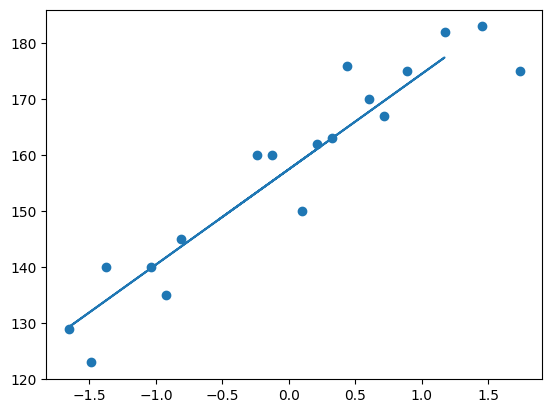

In [12]:
plt.scatter(X_train, y_train)
plt.plot(X_test, lr.predict(X_test))

In [13]:
y_pred = lr.predict(X_test)
y_pred, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

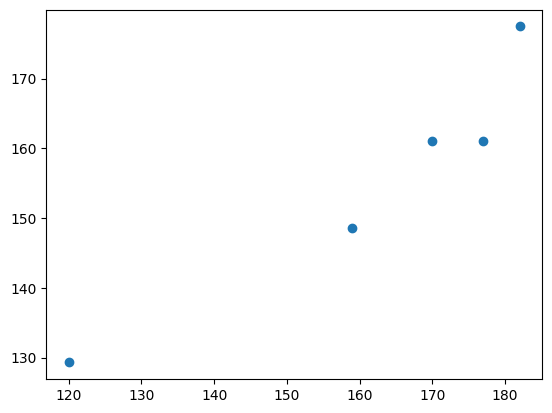

In [ ]:
plt.scatter(y_test,y_pred)
## If linear then it is a descent Model

In [18]:
## Now let say we have a new data point
weight = 80
scaled_weight = sc.transform([[weight]])
scaled_weight

/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [ ]:
print("The height for weight 80 kg is",lr.predict(scaled_weight)) 

The height for weight 80 kg is [163.01076266]


In [29]:
## Residuals
residuals = y_test-y_pred
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

/var/folders/sk/nvhlx8ms5c9_t6cj0ct_3x5r0000gn/T/ipykernel_72708/3301513583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde = True)


<Axes: xlabel='Height', ylabel='Density'>

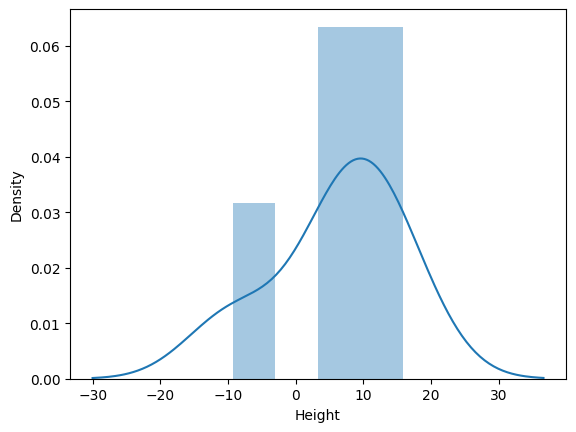

In [34]:
import seaborn as sns
sns.distplot(residuals, kde = True)